In [1354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1355]:
import yfinance as yf
import datetime as dt

In [1356]:
stock = ['INFY.NS']
start = dt.datetime(2020,1,1)
end = dt.datetime(2025,1,1)

In [1357]:
all_data = []

In [1358]:
def get_stock(stock,start,end):
    
    for stock_id in stock:
        
        df = yf.download(stock_id, start=start, end=end)
        df = df[['Open', 'High', 'Low', 'Close', 'Volume']]  
        df['Date'] = df.index
        df['stock_id'] = stock_id
        df.reset_index(drop=True, inplace=True)
        all_data.append(df)
        
    if all_data:
            return pd.concat(all_data, ignore_index=True)
    return pd.DataFrame()

In [1359]:
df = get_stock(stock,start,end)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27360\4235868153.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [1360]:
df.reset_index()
df.columns = df.columns.droplevel(1)
df['Date'] = pd.to_datetime(df['Date'])

In [1361]:
df.head()


Price,Open,High,Low,Close,Volume,Date,stock_id
0,650.393981,654.818430,648.225991,652.031006,2112415,2020-01-01,INFY.NS
1,653.845088,655.526346,646.765970,650.128540,5658200,2020-01-02,INFY.NS
2,649.420662,661.897587,649.420662,660.127808,7882938,2020-01-03,INFY.NS
3,660.216170,667.029832,651.721251,653.800720,6519403,2020-01-06,INFY.NS
4,653.048694,657.119165,641.633593,644.111328,7899363,2020-01-07,INFY.NS


In [1362]:
from finta import TA

In [1363]:
df['sma_20'] = TA.SMA(df, 20)
df['ema_10'] = TA.EMA(df, 10)
df['ema_20'] = TA.EMA(df, 20)
df['rsi'] = TA.RSI(df)
df['macd'] = TA.MACD(df)['MACD']
df['bb_upper'] = TA.BBANDS(df)['BB_UPPER']
df['bb_lower'] = TA.BBANDS(df)['BB_LOWER']
df['Return'] = df['Close'].pct_change()
df['macd_signal'] = TA.MACD(df)['SIGNAL']

In [1364]:
df.isna().sum()

Price
Open            0
High            0
Low             0
Close           0
Volume          0
Date            0
stock_id        0
sma_20         19
ema_10          0
ema_20          0
rsi             1
macd            0
bb_upper       19
bb_lower       19
Return          1
macd_signal     0
dtype: int64

In [1365]:
df.dropna(inplace= True)

In [1366]:
df.isna().sum()

Price
Open           0
High           0
Low            0
Close          0
Volume         0
Date           0
stock_id       0
sma_20         0
ema_10         0
ema_20         0
rsi            0
macd           0
bb_upper       0
bb_lower       0
Return         0
macd_signal    0
dtype: int64

In [1367]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Date', 'stock_id', 'sma_20',
       'ema_10', 'ema_20', 'rsi', 'macd', 'bb_upper', 'bb_lower', 'Return',
       'macd_signal'],
      dtype='object', name='Price')

In [1368]:
df.head()

Price,Open,High,Low,Close,Volume,Date,stock_id,sma_20,ema_10,ema_20,rsi,macd,bb_upper,bb_lower,Return,macd_signal
19,691.098944,691.806845,683.134936,688.444275,5121009,2020-01-28,INFY.NS,670.045169,683.428577,678.077695,65.439825,5.563498,707.502978,632.587360,-0.000128,4.546687
20,696.054234,701.540561,693.974765,698.797424,6832757,2020-01-29,INFY.NS,672.383490,686.264850,680.325817,70.718178,6.162029,710.929410,633.837570,0.015038,4.872763
21,698.797443,698.797443,688.444222,690.833435,3859680,2020-01-30,INFY.NS,674.418735,687.105674,681.450986,62.775686,6.017801,712.309897,636.527573,-0.011397,5.103473
22,690.700720,694.594257,682.780946,686.630249,6092028,2020-01-31,INFY.NS,675.743857,687.018369,681.999097,59.008860,5.549047,713.383526,638.104188,-0.006084,5.193117
23,691.983636,699.903408,676.498069,679.064270,6416745,2020-02-03,INFY.NS,677.007034,685.560361,681.691765,52.860154,4.599342,713.214474,640.799594,-0.011019,5.073798


In [1369]:
df.describe(include='number')

Price,Open,High,Low,Close,Volume,sma_20,ema_10,ema_20,rsi,macd,bb_upper,bb_lower,Return,macd_signal
count,1219.000000,1219.000000,1219.000000,1219.000000,1.219000e+03,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,1345.211629,1358.296859,1331.910208,1345.136536,7.500914e+06,1335.565296,1340.674404,1335.660915,54.181970,6.977385,1408.899426,1262.231166,0.000967,6.941315
std,330.532058,332.076986,328.157417,330.376205,5.166423e+06,329.366466,329.312625,328.181918,12.957627,24.947725,341.643022,320.837951,0.017586,23.540571
min,450.630186,493.768569,450.630186,465.850220,3.719660e+05,534.701297,527.691653,559.940816,14.589462,-66.510796,599.872113,425.663878,-0.100393,-58.898224
25%,1213.898009,1224.416616,1200.843346,1213.172791,4.693163e+06,1210.641632,1212.181870,1217.001596,45.790534,-7.048573,1268.234428,1146.196157,-0.008401,-6.197035
50%,1401.128837,1412.447561,1387.943989,1401.864624,6.265593e+06,1395.866772,1397.433188,1399.943175,55.038926,9.556271,1460.430934,1324.586320,0.000910,9.892183
75%,1561.868082,1578.340722,1545.773556,1563.001770,8.710219e+06,1559.936926,1560.616546,1554.142311,63.184989,23.757874,1631.543102,1464.566513,0.009905,23.051951
max,1967.763256,1978.610690,1950.160948,1971.954346,9.043211e+07,1909.103699,1932.932295,1905.744755,88.137008,82.444299,1992.808738,1838.198715,0.120334,75.652393


In [1370]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Date', 'stock_id', 'sma_20',
       'ema_10', 'ema_20', 'rsi', 'macd', 'bb_upper', 'bb_lower', 'Return',
       'macd_signal'],
      dtype='object', name='Price')

In [1371]:
import plotly.graph_objects as go
import plotly.io as pio

In [1372]:
pio.renderers.default = 'browser'

fig = go.Figure(data=[
    go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        increasing_line_color='green',
        decreasing_line_color='red'
    )
])

fig.update_layout(
    title='INFY.NS Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

fig.show()

In [1373]:
window_size = 15

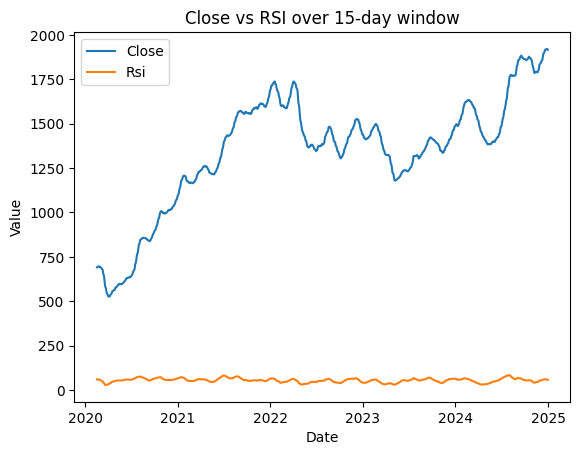

In [1374]:
sns.lineplot(data= df ,x=df['Date'],y=df['Close'].rolling(window_size).mean(),label='Close')
sns.lineplot(data= df ,x=df['Date'],y=df['rsi'].rolling(window_size).mean(),label='Rsi')
plt.title(f'Close vs RSI over {window_size}-day window')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Chart for observing RSI 
if RSI is above 70 it show overbought &
less than 30 shows oversold

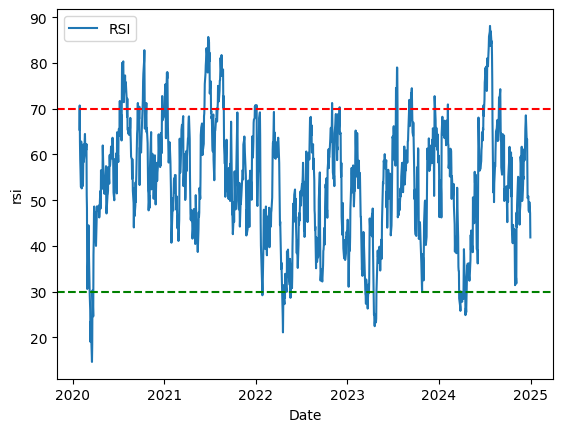

In [1375]:
sns.lineplot(data=df, x='Date', y='rsi', label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.show()

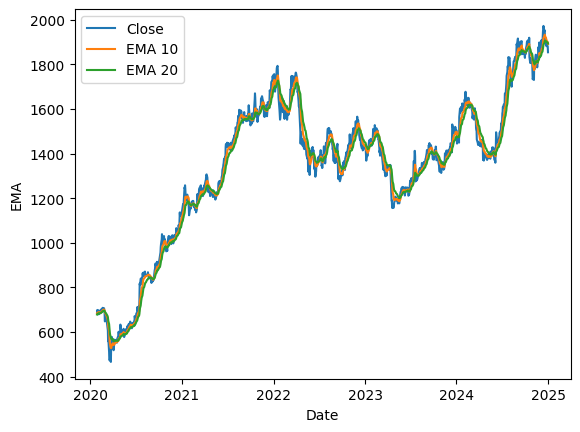

In [1376]:
sns.lineplot(data=df, x='Date', y='Close', label='Close')
sns.lineplot(data=df, x='Date', y='ema_10', label='EMA 10')
sns.lineplot(data=df, x='Date', y='ema_20', label='EMA 20')
plt.xlabel('Date')
plt.ylabel('EMA')
plt.legend()
plt.show()

Same Chart of EMA & close price in plottly for making more intractive

In [1377]:
import plotly.express as px

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['ema_10'], mode='lines', name='EMA 10'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['ema_20'], mode='lines', name='EMA 20'))

fig.update_layout(
    title='Price with EMAs',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True,
    hovermode='x unified'
)

fig.show()


## chart for MACD 

It acts as a trigger for buy/sell decisions:

* MACD crosses above the signal line → Buy signal

* MACD crosses below the signal line → Sell signal



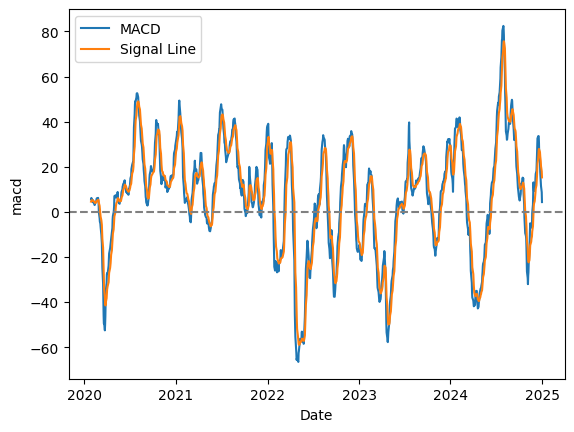

In [1378]:
sns.lineplot(data=df, x='Date', y='macd', label='MACD')
sns.lineplot(data=df, x='Date', y='macd_signal', label='Signal Line')
plt.axhline(0, color='gray', linestyle='--')  # zero line
plt.show()

Same Chart of MACD in plottly for making more intractive

In [1379]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['macd'], mode='lines', name='MACD'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['macd_signal'], mode='lines', name='Signal'))

fig.update_layout(title='MACD vs Signal Line', xaxis_title='Date', yaxis_title='MACD')
fig.show()


## Bollinger Band

Bollinger Bands are a technical analysis tool that visualize volatility and price levels relative to a moving average. They're commonly used to identify:

* Overbought and oversold conditions

* Potential trend reversals

* Periods of low/high volatility

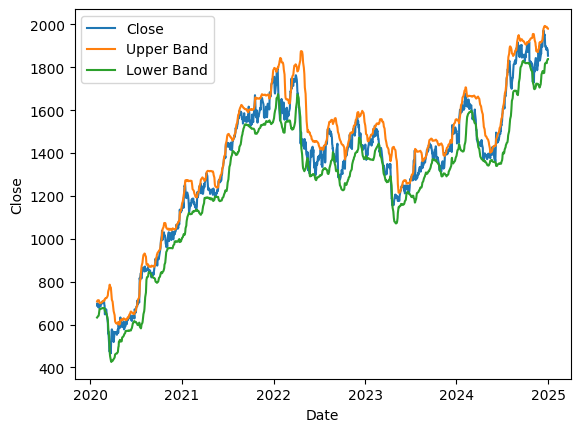

In [1380]:
sns.lineplot(data=df, x='Date', y='Close', label='Close')
sns.lineplot(data=df, x='Date', y='bb_upper', label='Upper Band')
sns.lineplot(data=df, x='Date', y='bb_lower', label='Lower Band')
plt.show()

In [1381]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['bb_upper'], name='Upper Band'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['bb_lower'], name='Lower Band'))

fig.update_layout(title='Bollinger Bands', xaxis_title='Date', yaxis_title='Price')
fig.show()
